In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA


In [2]:
# Load the cleaned dataset
company = pd.read_csv("cleaned_companies.csv")

### EDA (Exploratory Data Analysis)

### 1. Basic exploration of the dataset

In [4]:
print(company.head())  # Check the first few rows
print(company.info())  # Get info on column types and null values
print(company.describe())  # Summary statistics for numerical features

# Check for missing values
print(company.isnull().sum())

      status  founded_at first_investment_at last_investment_at  \
0   acquired        2007                 NaN                NaN   
1  operating        2003                 NaN                NaN   
2  operating        2003                 NaN                NaN   
3  operating        2010                 NaN                NaN   
4  operating        2006                 NaN                NaN   

   investment_rounds  first_funding_at  last_funding_at  funding_rounds  \
0               10.0            2008.0           2008.0             1.0   
1               10.0            2011.0           2012.0             3.0   
2               10.0            2003.0           2003.0             1.0   
3               10.0            2011.0           2011.0             1.0   
4               10.0            2011.0           2012.0             2.0   

   funding_total_usd  first_milestone_at  ...  country_ESP  country_FRA  \
0          5000000.0         2008.000000  ...        False        False

### 2. Visualize distributions of numerical features (Univariate Analysis)

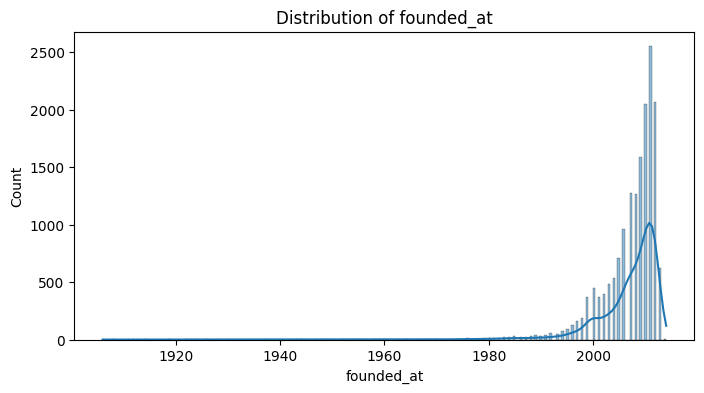

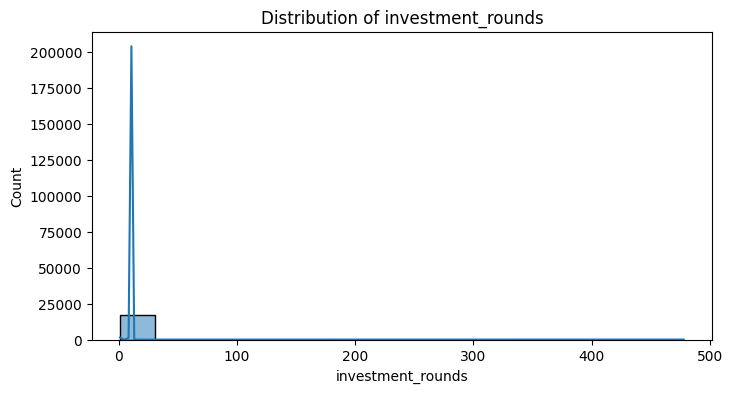

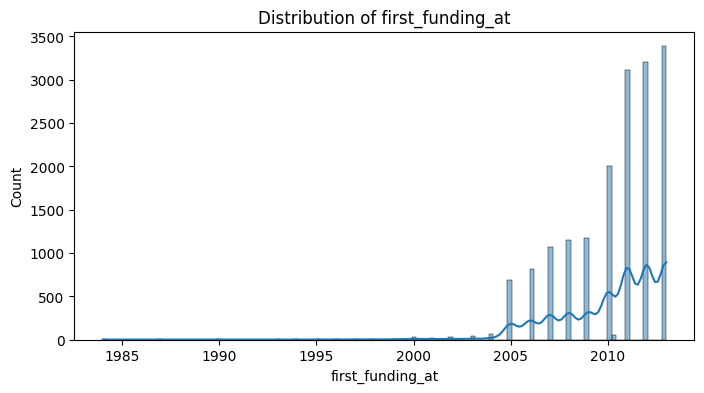

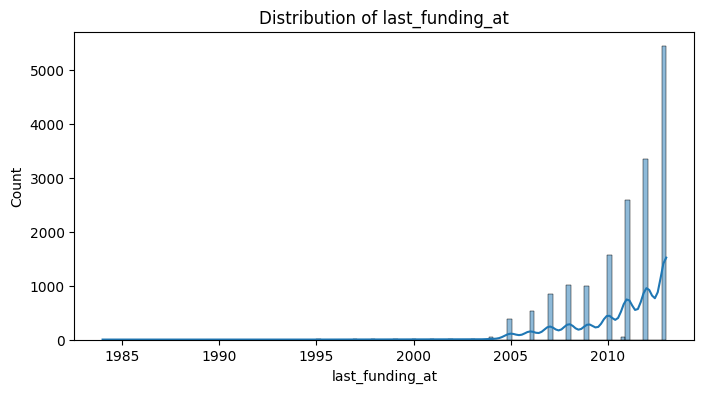

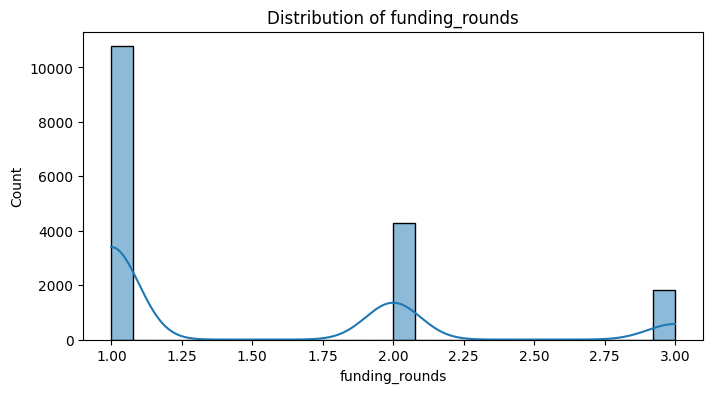

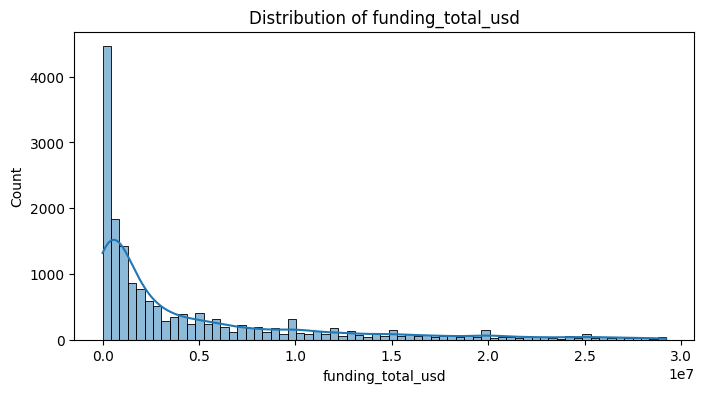

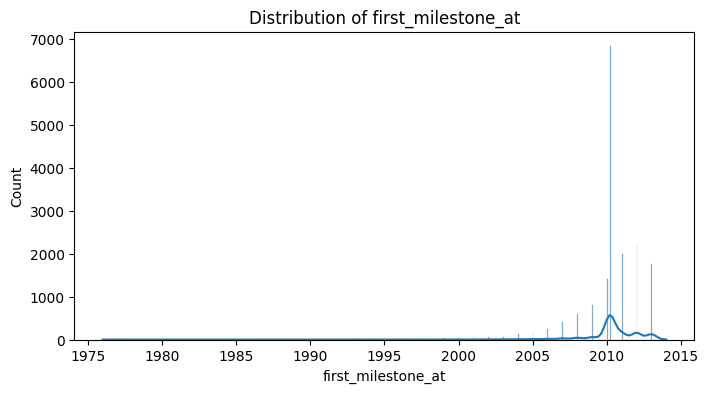

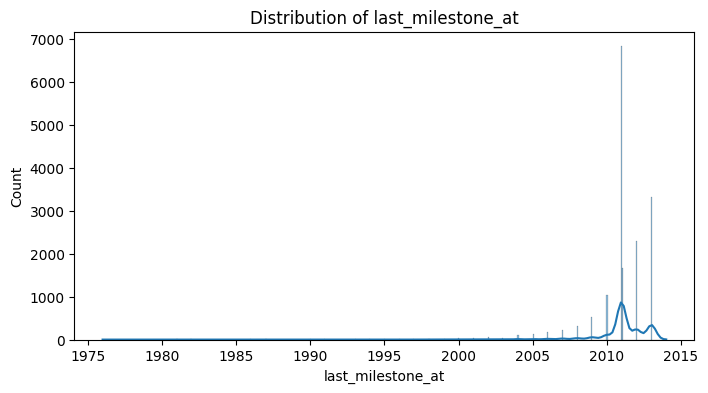

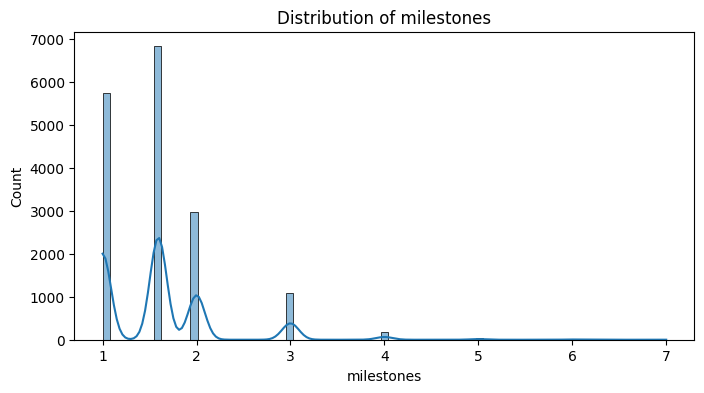

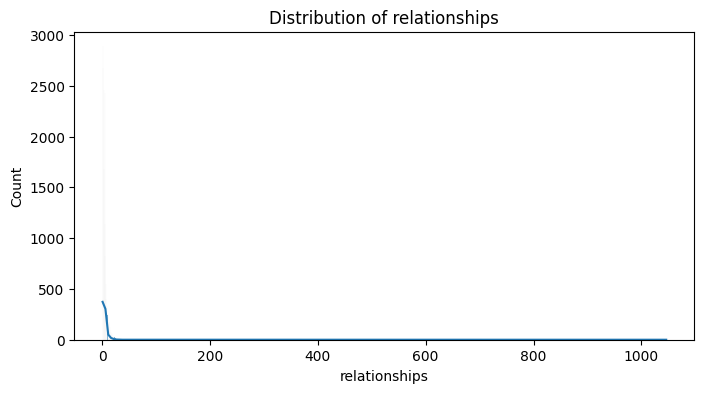

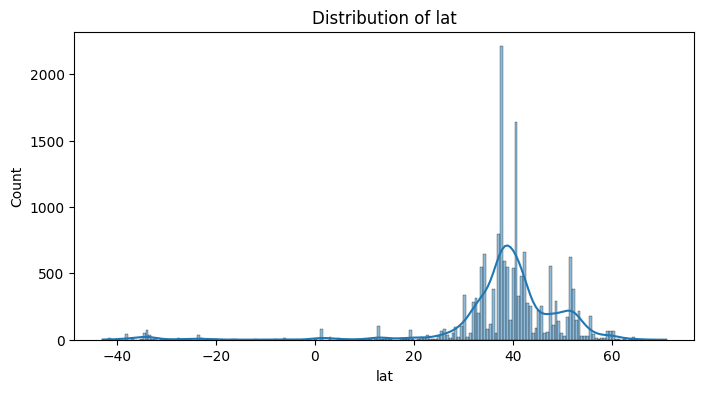

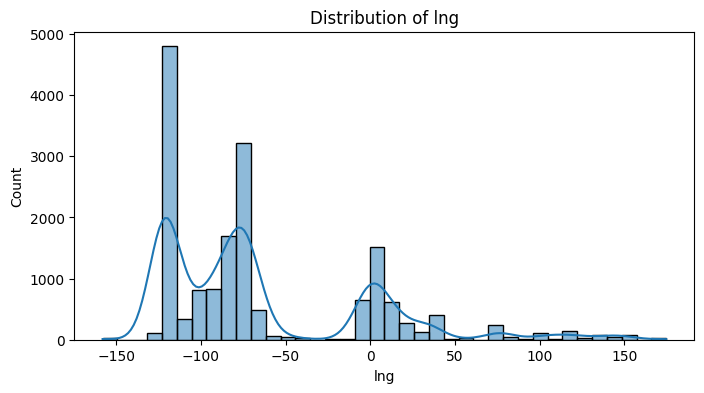

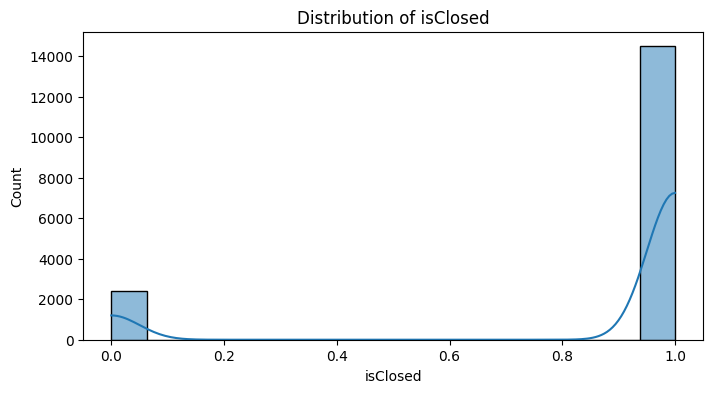

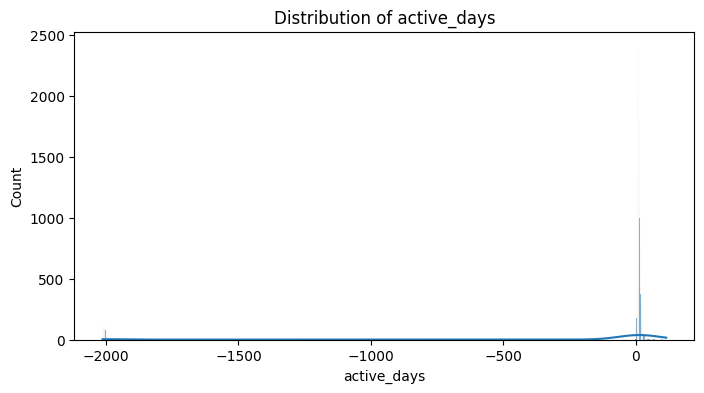

C:\Users\user\.conda\envs\gpu\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


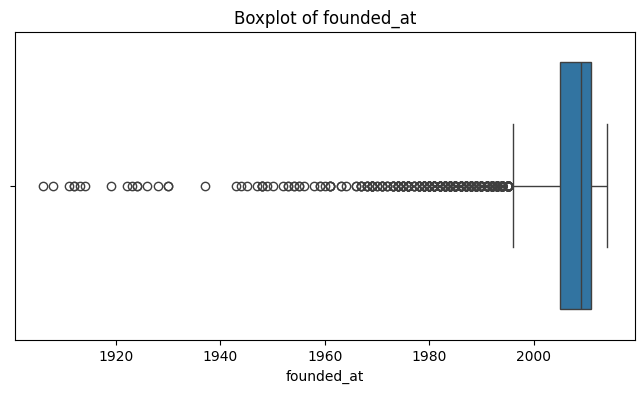

C:\Users\user\.conda\envs\gpu\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


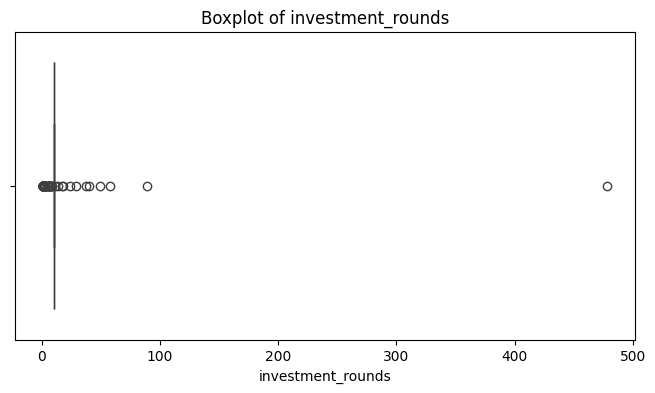

C:\Users\user\.conda\envs\gpu\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


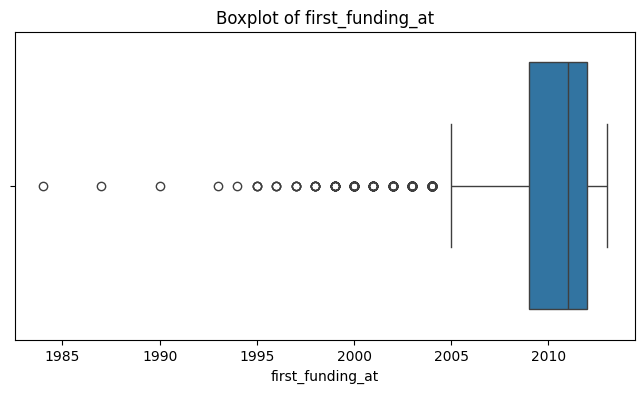

C:\Users\user\.conda\envs\gpu\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


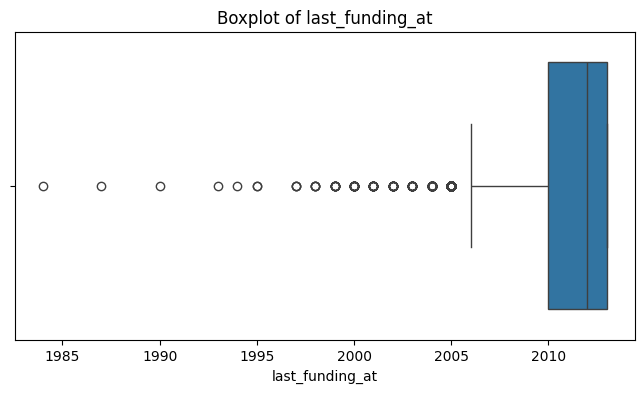

C:\Users\user\.conda\envs\gpu\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


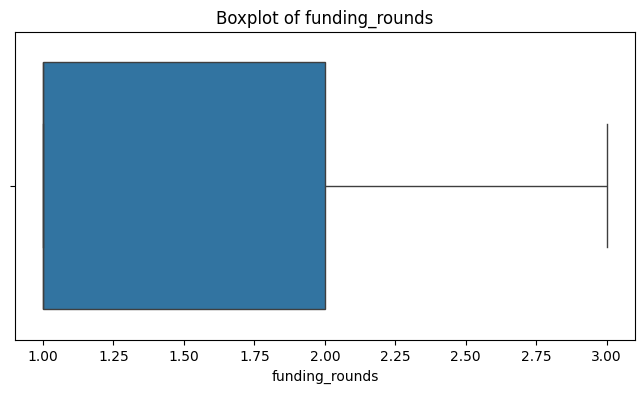

C:\Users\user\.conda\envs\gpu\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


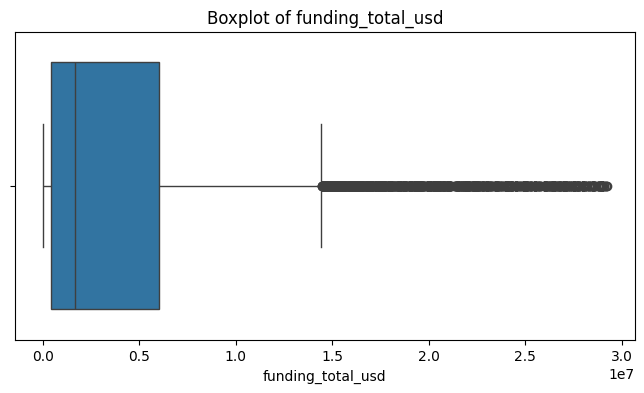

C:\Users\user\.conda\envs\gpu\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


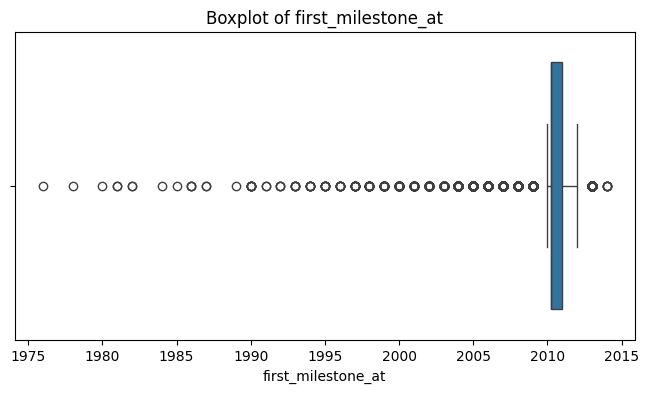

C:\Users\user\.conda\envs\gpu\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


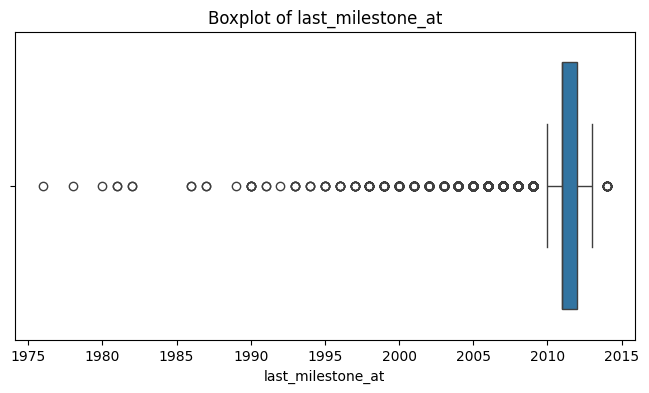

C:\Users\user\.conda\envs\gpu\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


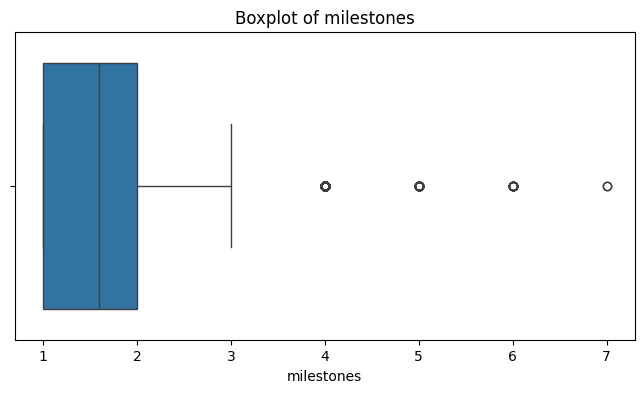

C:\Users\user\.conda\envs\gpu\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


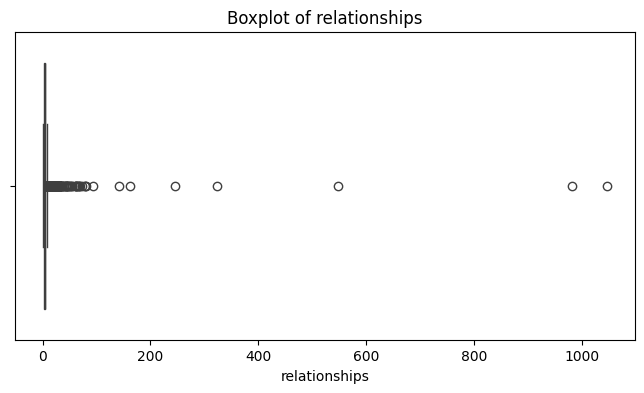

C:\Users\user\.conda\envs\gpu\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


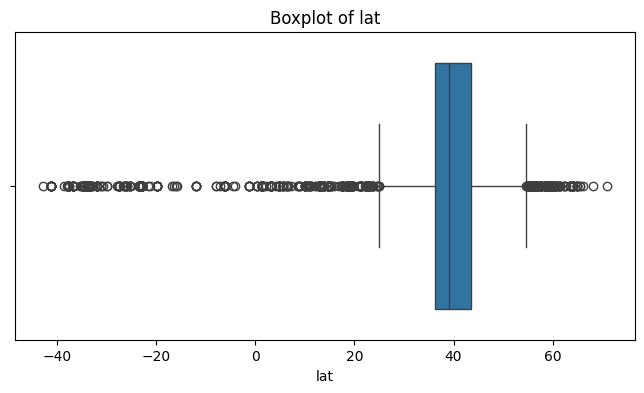

C:\Users\user\.conda\envs\gpu\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


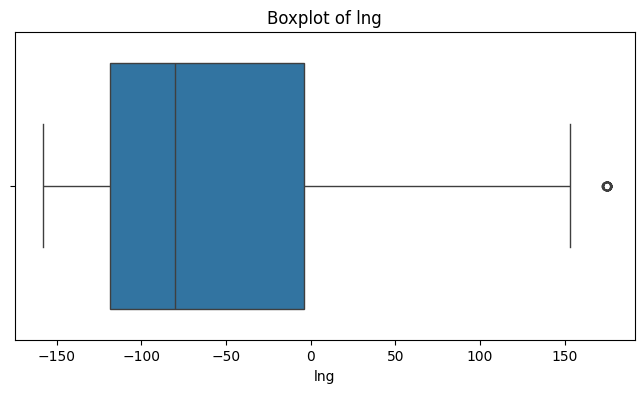

C:\Users\user\.conda\envs\gpu\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


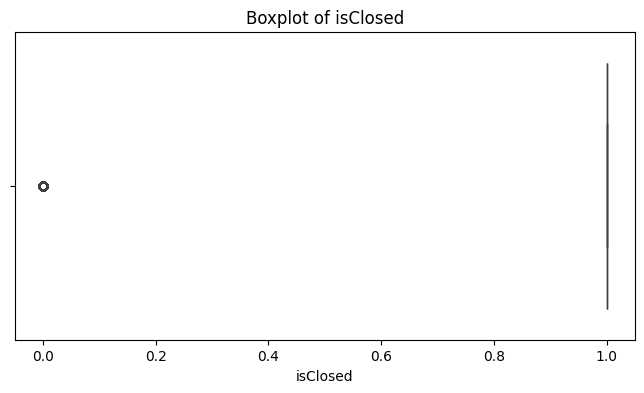

C:\Users\user\.conda\envs\gpu\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


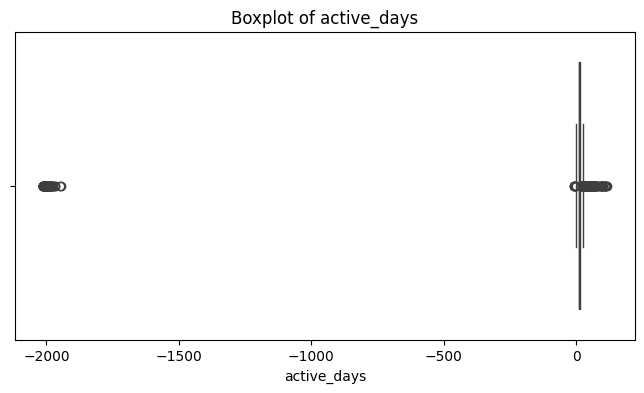

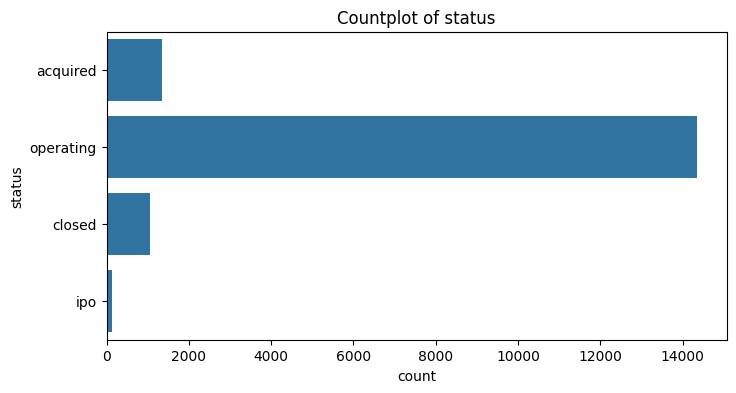

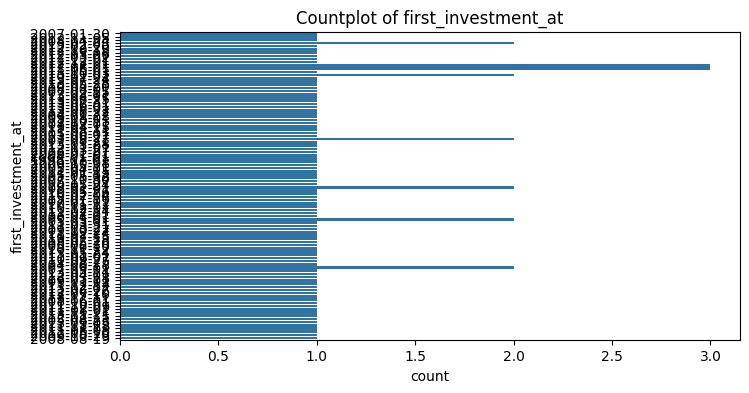

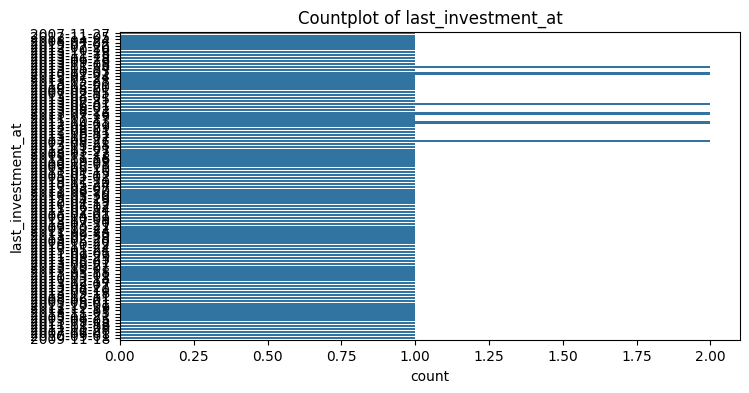

In [5]:
numeric_cols = company.select_dtypes(include=['number']).columns

# Histograms for each numeric feature
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(company[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Boxplots to check for outliers
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=company[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# For categorical features (Univariate Analysis)
categorical_cols = company.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=company[col])
    plt.title(f'Countplot of {col}')
    plt.show()

### 3. Bivariate Analysis

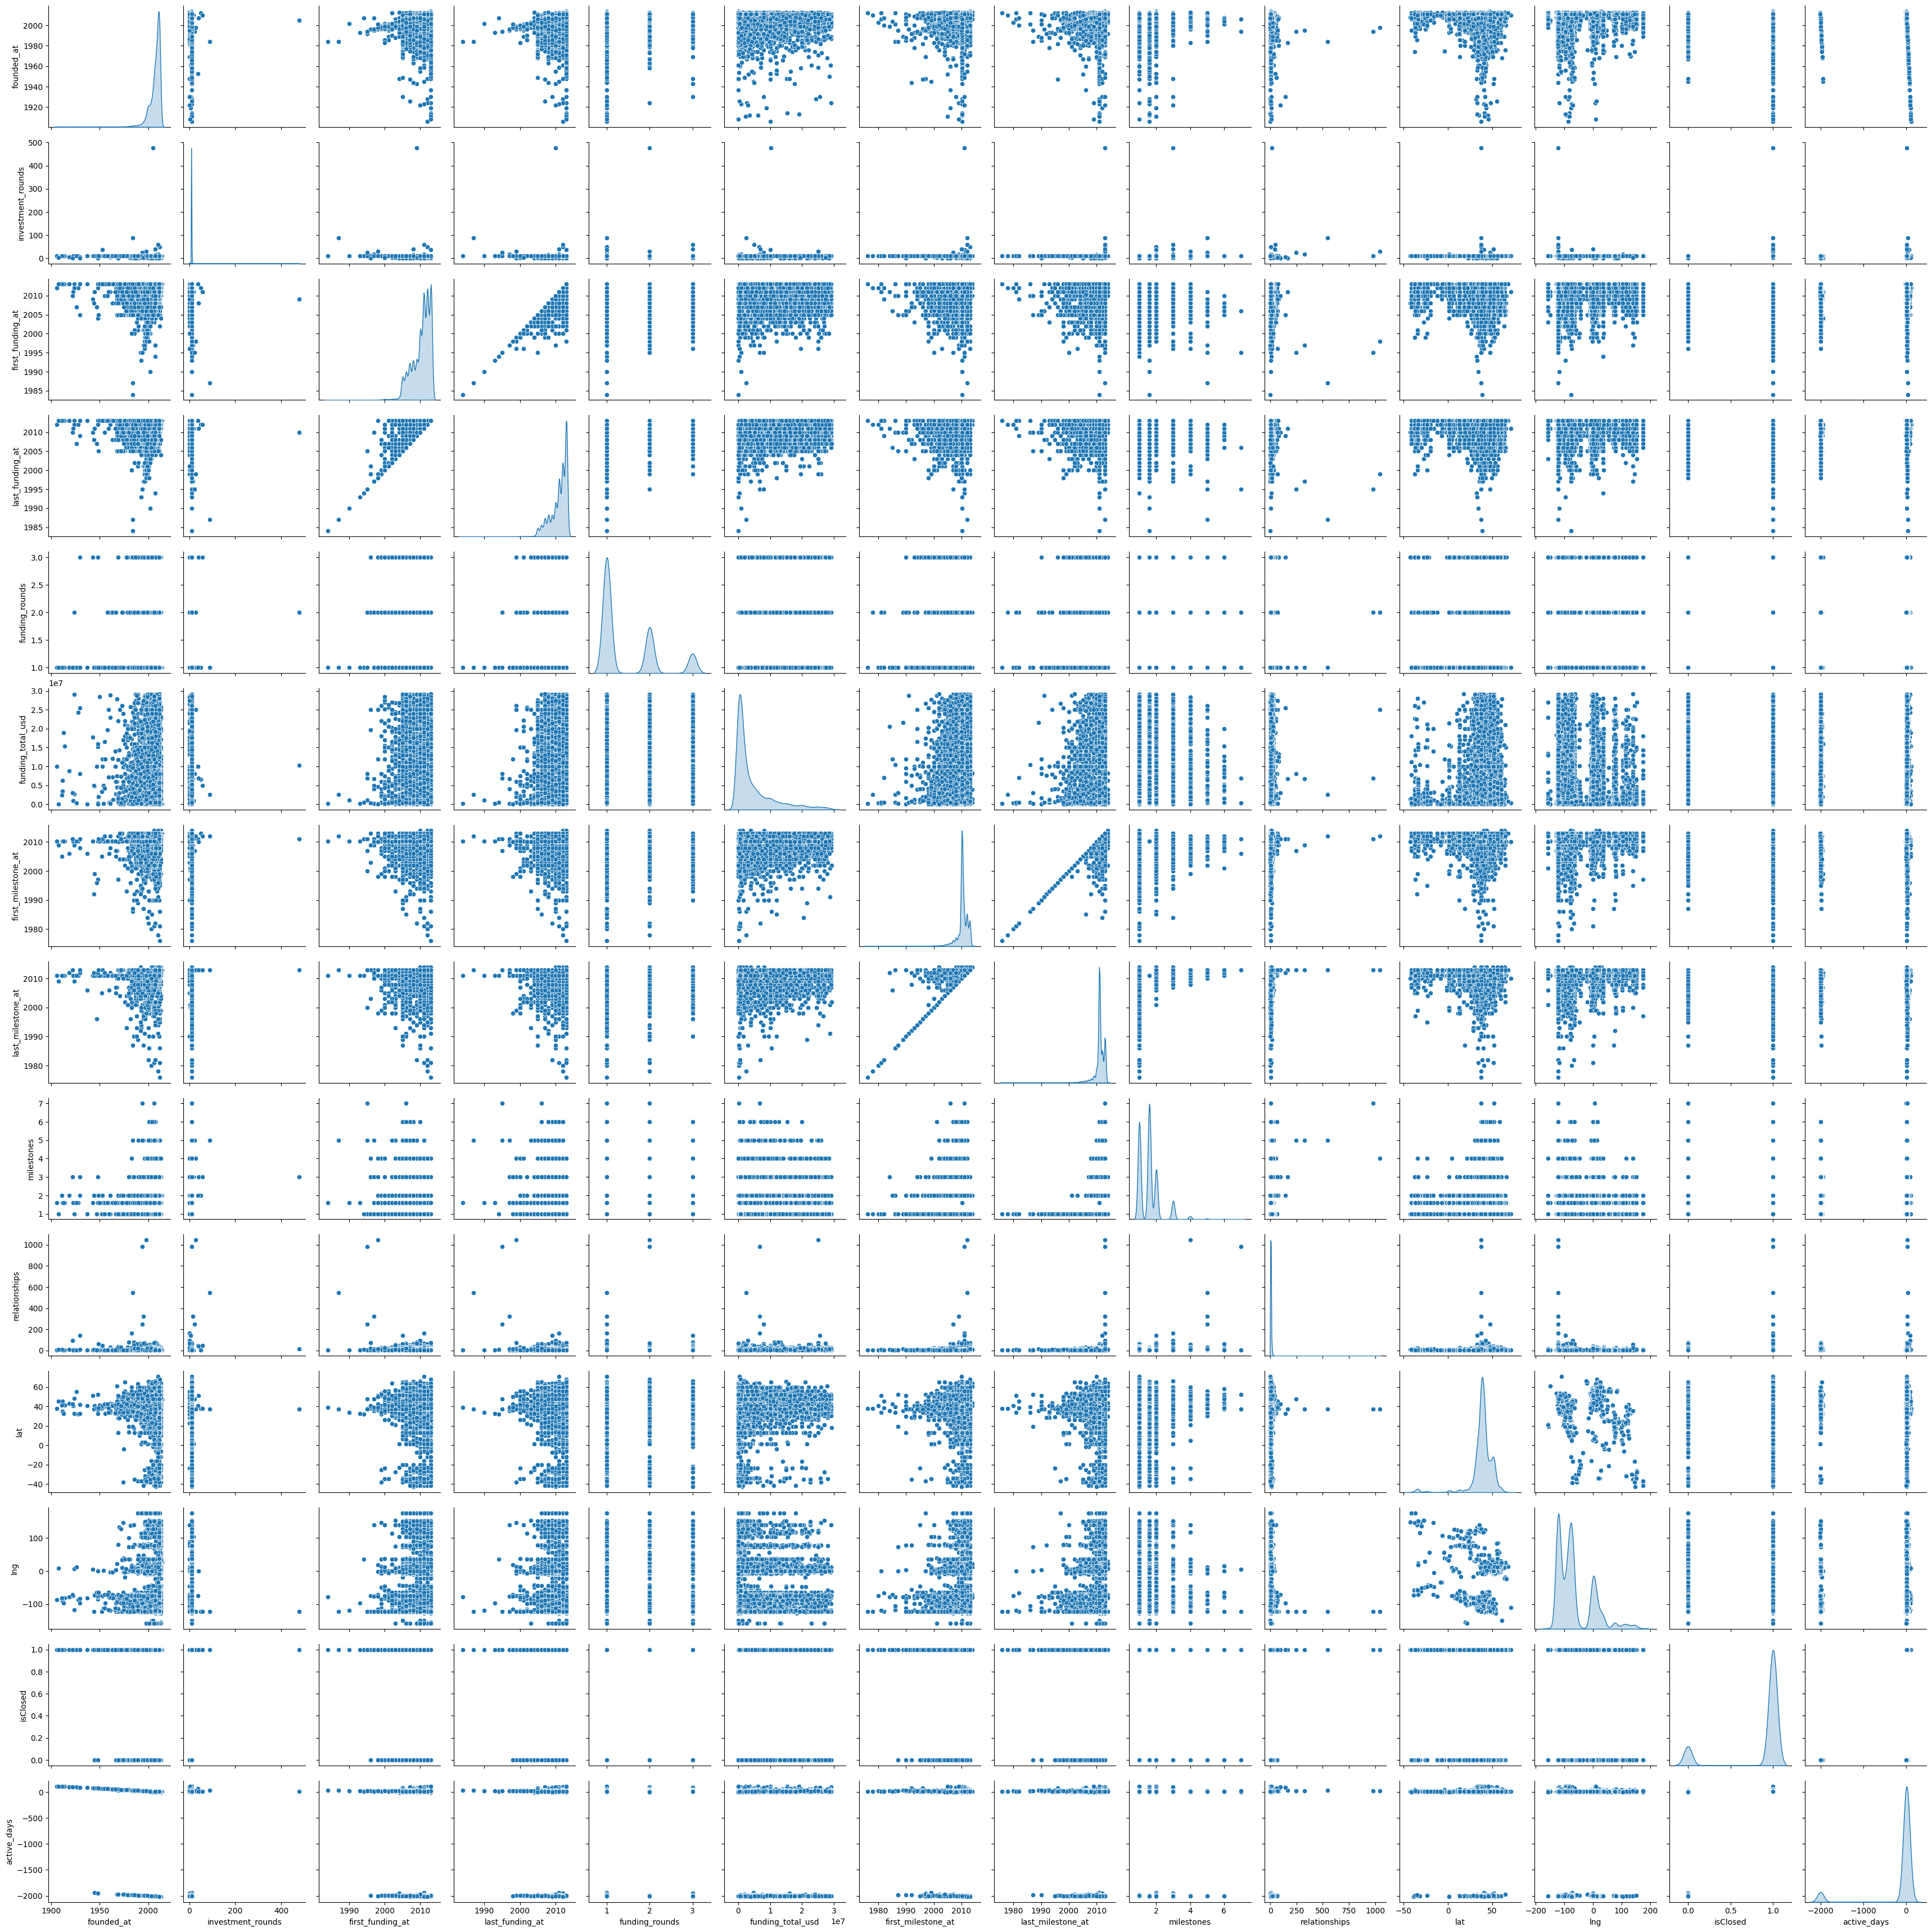

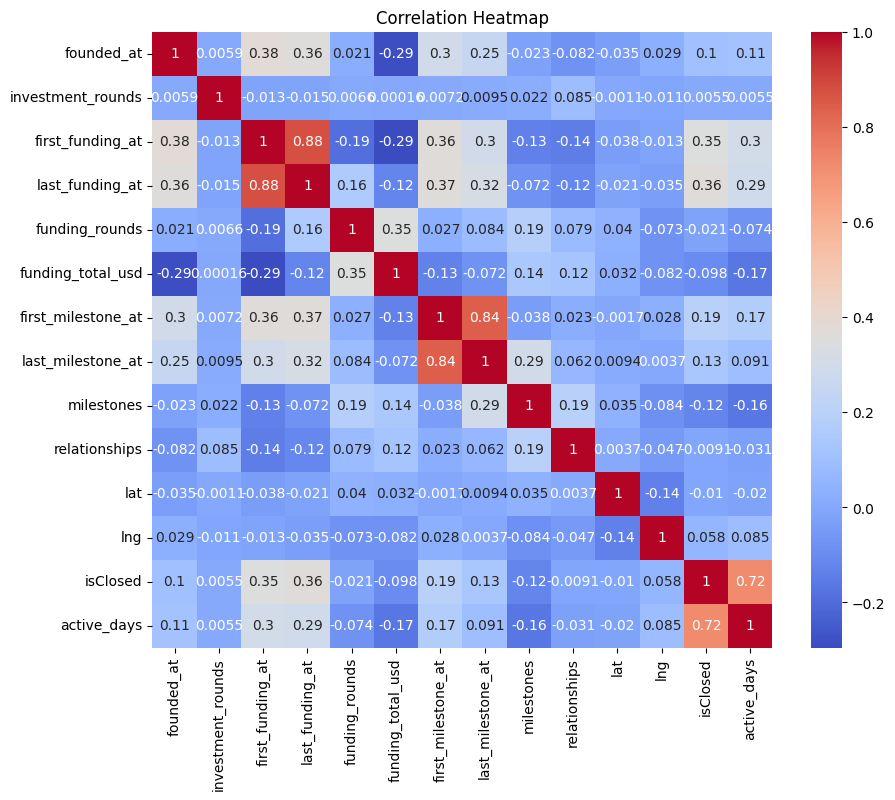

KeyError: 'CreditScore'

In [6]:
# Pairplot for numerical features
sns.pairplot(company[numeric_cols], diag_kind='kde')
plt.show()

# Correlation matrix and heatmap
corr = company[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatterplot for selected pairs of numerical features
sns.scatterplot(x=company['CreditScore'], y=company['OrigInterestRate'])
plt.title('Credit Score vs Original Interest Rate')
plt.show()

# Boxplot for a categorical feature vs a numerical feature
sns.boxplot(x=company['LoanPurpose'], y=company['OrigInterestRate'])
plt.title('Loan Purpose vs Original Interest Rate')
plt.show()

### 4. Multivariate Analysis

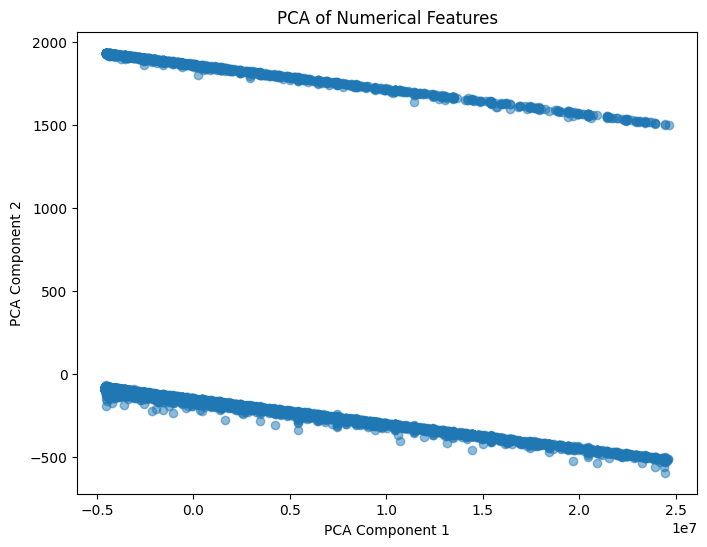

In [7]:
# Dimensionality reduction with PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(company[numeric_cols].dropna())

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title('PCA of Numerical Features')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
